# Metodo de Steepest Descent (maximo descenso)
La direccion de descenso minimo es

$$ u = - \frac{\nabla_{\theta}(\theta)}{ \| \nabla_{\theta} J(\theta \|
}.$$

El algoritmo comienza con in $\theta_0$ (initial guess, random).
El proximo paso seria

$$\theta_1 = \theta_0 - \alpha \nabla_{\theta} J(\theta_0) .$$


La pregunta es quien es $\alpha$? En esta clase encontramos el $\alpha$ optimo.
para el problema $A \theta = b$.

Discusion. Que tan grande puede ser $\alpha$ o que tan pequenho.




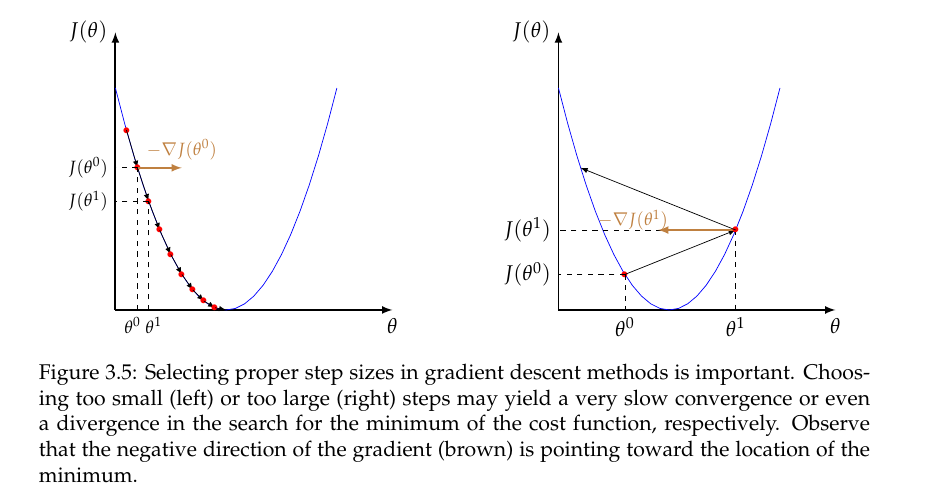

En el caso de $A \theta = b$, $A=X^T X$, $b=X^T y$ sabemos

$$ \nabla_{\theta} J(\theta)  = X^T ( X \theta - y) = X^T X \theta - X^T y= A \theta - b.$$

Nos hacemos dos preguntas.

1. El gradiente apunta al minimo? si no?
2. Que tan lejos llegamos con determinado $\alpha$.

Dirijamonos a la pregunta 1. Cuando $J$ es una funcion de una sola variable, si.
Sin embargo si $J(\theta)$ es funcion de varias variables $\theta \in \mathbb{R}^n$, $n>1$ este no es el caso. El gradiente no apunta al minimo.




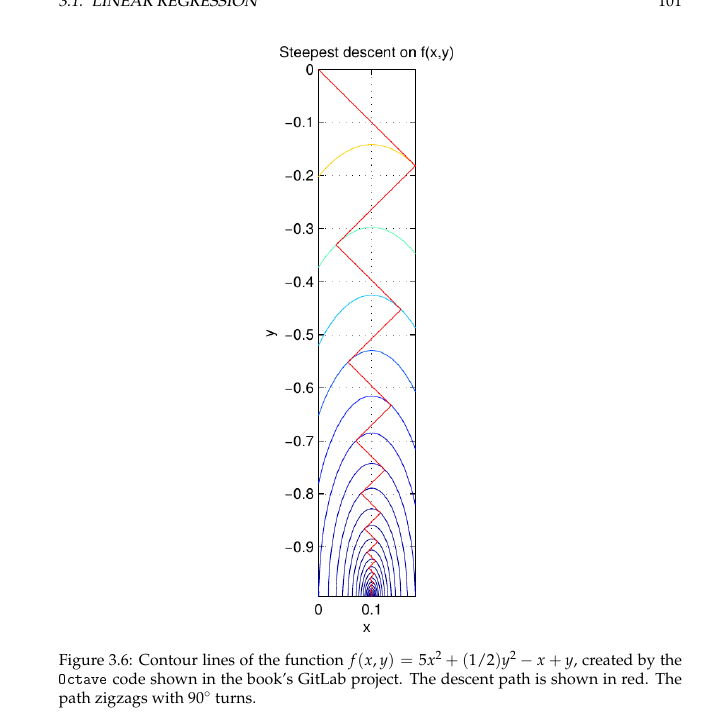

Para en problema 1. el gradiente apunte al minimo cuando fijamos la trayectoria a un plano se necesita el algoritmo de **gradiente conjugado** (lo mencionamos sin detalles en la proxima clase). Por ahora vivimos con la direccion que nos da el steeepest descent.

Queremos optimizar el $\alpha$ que nos minimice el numero de iteraciones.

De nuevo

$$ \nabla_{\theta} J(\theta)= A \theta - b.$$

Otra forma de entender que la minimizacion de una cuadratica corresponde a la solucion de una lineal es. Piense


$$ z = \frac12 \theta^T A \theta - b^T \theta + c .$$

Del calculo matricial

$$ \nabla z  =  A \theta - b.$$



Iniciamos con $\theta_0$, depues queremos encontrar $\alpha$ tal que

$$ \theta_1  = \theta_0 - \alpha \nabla J(\theta_0) .$$
Cual $\alpha$ es optimo?
Este es un problema de calculo.

Definimos


$$ \varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] .$$
Lo que dice calculo es derivar e igualar a 0. Usamos la **regla de la cadena**.
Aunque $\alpha \in \mathbb{R}$, $\theta_0, \theta_1 \in \mathbb{R}^n$

$$\varphi'(\alpha) = \nabla J[\theta_0 - \alpha \nabla J(\theta_0)] \cdot \nabla J(\theta_0) = 0   . \tag{1} $$

Veamos como resolvemos esta ecuacion por $\alpha$.

Llamemos

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0) . \tag{2}$$
de forma que tenemos de (1)

$$\nabla J(\theta_1) \cdot \nabla J(\theta_0) = 0 .$$

En la Ecuacion (2) muliplicar a ambos lados por $A$ y le restamos $b$


$$A \theta_1 - b = A \theta_0 - b - \alpha A \nabla J(\theta_0). \tag{3}$$

Simplificamos mas, con una nueva notacion.

\begin{eqnarray}
r_0 &=& A \theta_0 - b = \nabla J(\theta_0) \\
r_1 &=& A \theta_1 - b = \nabla J(\theta_1)
\end{eqnarray}
Aca $r_0, r_1$ son vectores residuales del problema.


Escribamos la Ecuacion (3) en la nueva notacion.

$$ r_1 = r_0 - \alpha A \nabla J(\theta_0) = r_0 - \alpha A r_0   . \tag{4}$$


Recuerden que $r_1 \cdot r_0 = 0$. Multiplicamos por $r_0$ la Ecuacion (4).


$$ 0 =  \| r_0 \|^2 - \alpha r_0^T A r_0.$$
Despejamos $\alpha$ de aca


$$ \alpha = \frac{ \| r_o \|^2 }{ r_0^T A r_0} .$$

Que pasa si $r_0^T A r_0 = 0$? En general no, pues $A$ es positiva
definida. Pero, cuando no toca regularizar, y en vez de $A$ usamos
$$ A + \lambda I .$$ , $\lambda > 0$.

Escribimos el algoritmo de **steepest descent**














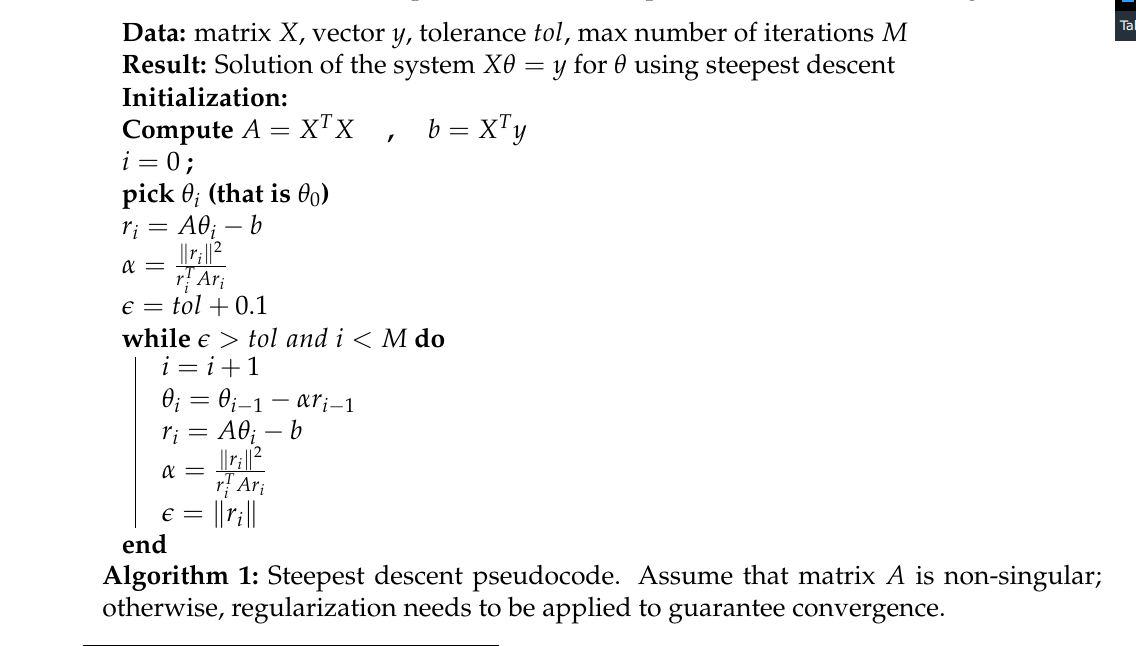

**Ejemplo**:

Considere la siguiente matriz $A=X^T X$ y el vector $b$ dados por

$$ A = X^T X = \begin{pmatrix} 10 & 0 \\ 0 & 1 \end{pmatrix} \quad , \quad b = \binom{1}{-1}.$$

Pensemos en la siguiente funcion objetivo, cuyo gradiente es $Ax - b$.


$$J(\theta) = \frac12 \theta^T A \theta  - b^T \theta  = \frac12 \theta^T X^T X \theta  - \theta^T X^T X \theta =  5 \theta_0^2  + \frac12 \theta_1^2 -\theta_0 + \theta_1 .$$

La grafica de las eliplses con el camino zigzageado corresponde a este ejemplo.
El valor optimo para 25 iteraciones es

$$J(0.100663, -0.993374) = -0.549976 .$$

Veamos la tabla generada por el algoritmo de steepest descent.

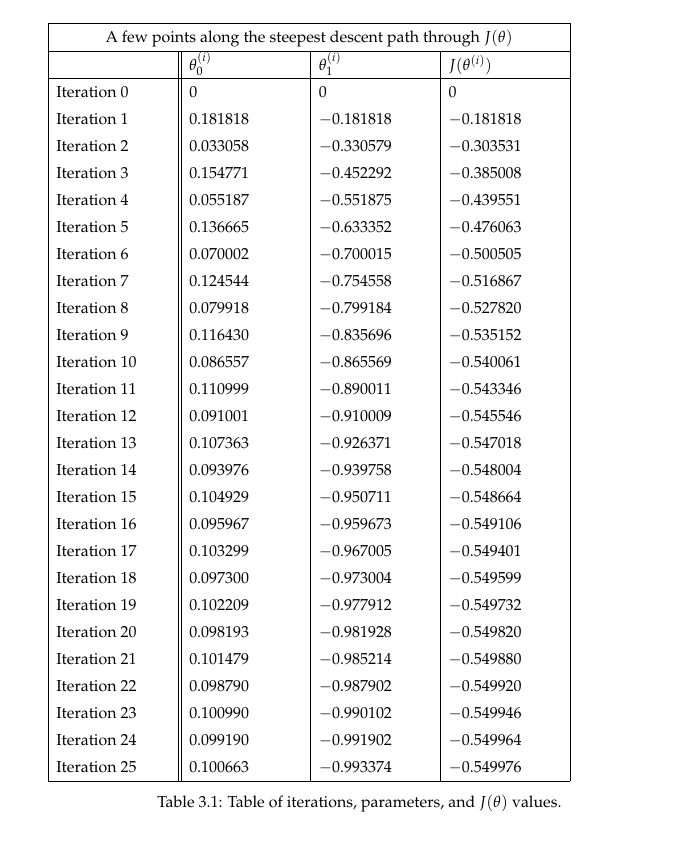

Veamos una grafica en "3D"

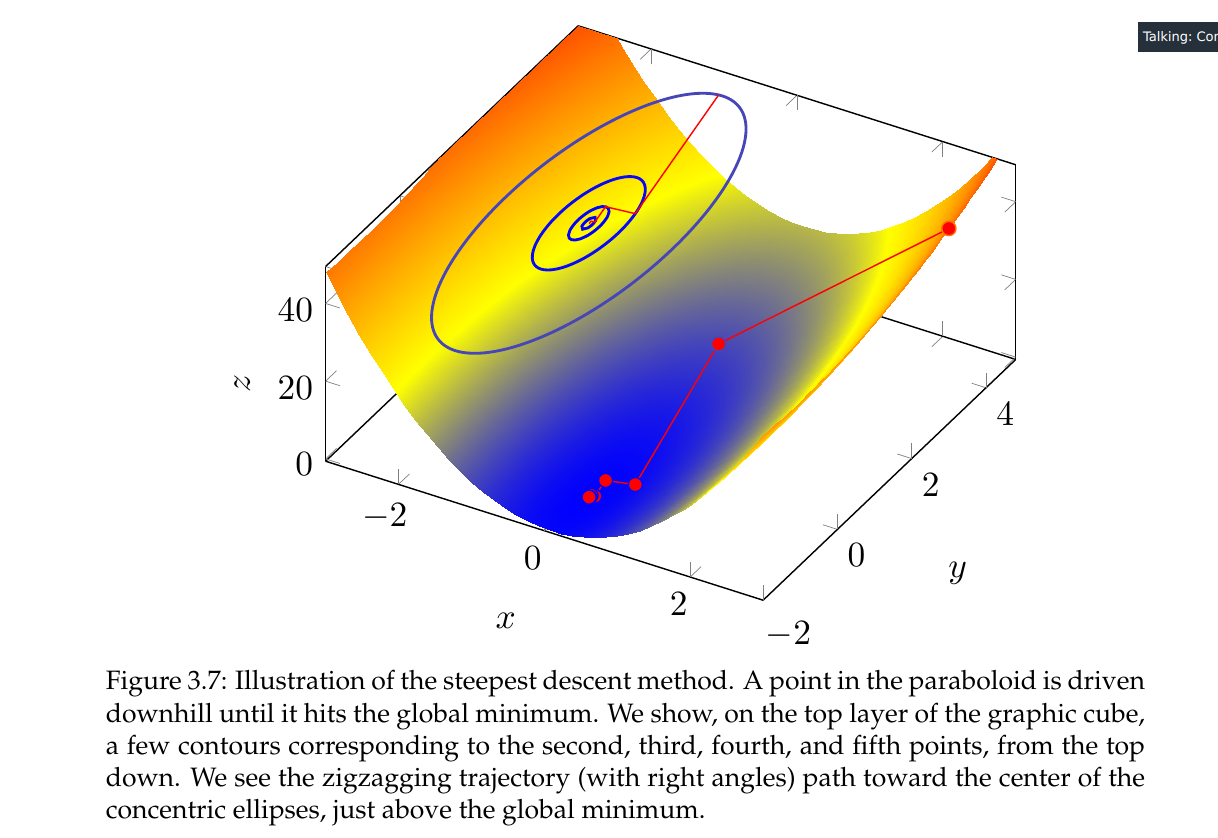


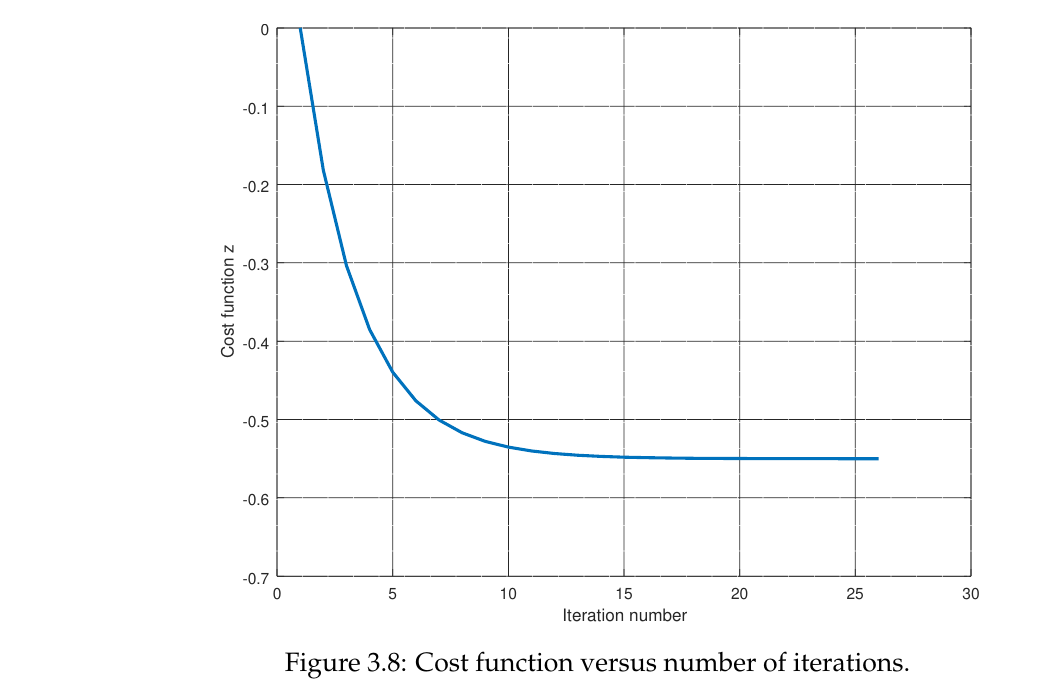

## Gradiente conjugado.
Recuerden la primera pregunta. La direccion del gradiente apunta al minimo? si o no?

En el caso de steepest descent las respuesta es **no** y ya vimos por que.

Tres grandes matematicos: Magnus Hestenes y Eduard Stiefel (estos publicaron juntos en 1952
[conjugate gradient](https://www.stat.uchicago.edu/~lekheng/courses/302/classics/hestenes-stiefel.pdf).

De otro lado, el mismo anho, Cornelius Lanczos (el mismo del SVD de este curso). Pensaron el siguiente problema.

Fijamos un plano, y sobre se plano buscamos la direccion que nos lleve directamente al centro de la curva en ese plano. Ver ilustracion a mano alzada.  Esta explicacion es puramente cualitativa.

Ellos encontraron que la direccion conjugada que nos tira
al centro de la elipse esta dada por una nueva **ortogonalidad** que esta definida como sigue.

**$A$-ortogonal**: Dos vectores son $A$ ortogonal
si cumplen la condicion

$$\langle Au, v \rangle = u^T A v = 0 .$$
Si $A$ es la identidad esto reduce  a $\langle u, v \rangle = 0$, que es la ortogonalidad tradicional.



El gradiente conjugado tiene la limitacion de que solo funciona para sistemas lineales $A \theta = b$.
Que pasa para sistemas mas complejos?



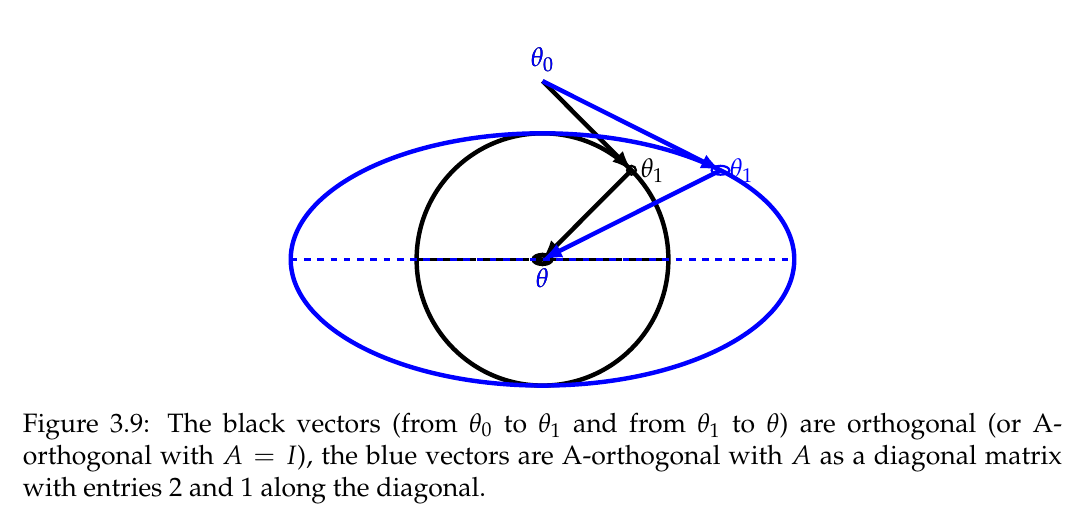

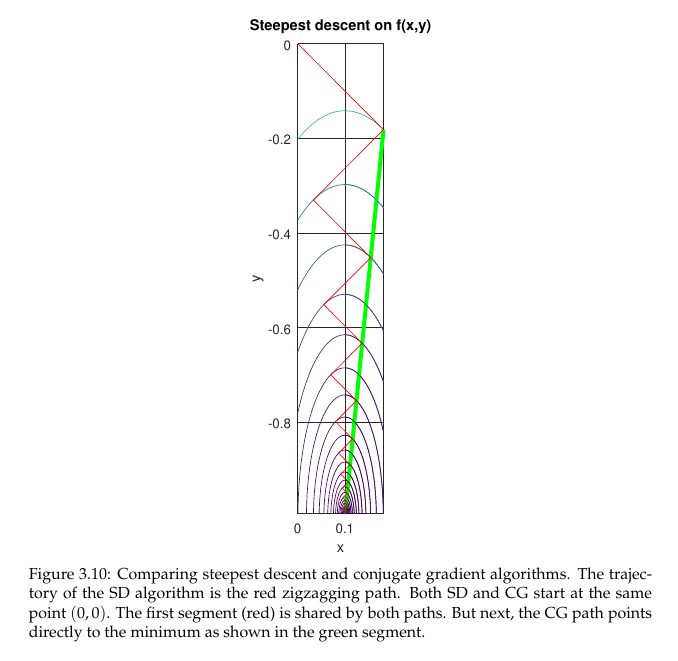

## Line search algoritmo for general cost functions.

Recordando un poco lo hicimos arriba

$$\theta_1 = \theta_0 - \alpha \nabla J(\theta_0).$$
La ecuacion

$$\varphi(\alpha) = J[ \theta_0 - \alpha \nabla J(\theta_0)] .$$

En general esta ecuacion no se le conoce la derivada.

En la proxima clase discutimos las alternativas que hay para hallar el $\alpha$.











